In [1]:
%matplotlib inline
import random
import os
import json
import sys
import string
import unicodedata
import pandas as pd
import seaborn as sns
import itertools

In [2]:
#Given local path, find full path
def PathFinder(path):
    script_dir = os.path.dirname('__file__')
    fullpath = os.path.join(script_dir,path)
    return fullpath

#Read Data for Deep Learning
def ReadData(path):
    fullpath=PathFinder(path)
    return np.loadtxt(fullpath,delimiter=',')

def getScales(X,Y):       
    distances = np.abs(X-5.0)+np.abs(Y-5.0)
    scalefactor = distances/2.0
    scalefactor[distances>=2] = 1.0
    return scalefactor

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib as mpl

def Virtualizing(ProgressData,Fix):
    sns.set_style(style='white')
    fig = plt.figure(figsize=(12, 6), dpi=100)
    iterations = [10,20,40,80,160,320,640]
    palette = itertools.cycle(sns.light_palette("navy", 8))
    color_tensorflow = next(palette)
    for i in range(1,8):
        ax9 = fig.add_subplot(2,4,i)
        ax9.set_xlim([0, 10])
        ax9.set_ylim([0, 10])
        delta = 0.05
        x = y = np.arange(0, 10.01, delta)
        X, Y = np.meshgrid(x, y)
        Z=getScales(X,Y)
        cp = plt.contour(X, Y, Z,extent=(0,10,0,10),cmap = sns.dark_palette("palegreen",reverse=True, as_cmap=True))
        ax9.clabel(cp, inline=True, 
              fontsize=10)
        ax9.scatter(0, 0, s=200, marker="o")
        ax9.scatter(8, 8, color='orange', s=500, marker="*")
        if i <= 8:
            Location_x=0;
            Location_y=0;
            ax9.get_xaxis().set_visible(False)
            ax9.get_yaxis().set_visible(False)
            #if i == 5:
                #plt.setp(ax9.get_yticklabels(), visible=True)
                #ax9.set_ylabel('Y-AXIS')
            #if i >= 5:
                #ax9.set_xlabel('X-AXIS')
            color_tensorflow = next(palette)
            ax9.yaxis.tick_right()
            Data = ProgressData[i-1]
            for i in range(len(Data)):
                #plt.plot([Location_x,Data[i,0]], [Location_y,Data[i,1]],color=color_tensorflow,lw=1.5)
                ax9.plot([Location_x,Data[i,0]], [Location_y,Data[i,1]],color=color_tensorflow, marker='*',lw=1.5)
                Location_x=Data[i,0]
                Location_y=Data[i,1]
#         if i == 7:
#             #ax9.set_xlabel('X-AXIS')
#             ax9.yaxis.tick_right()
#             #ax9.get_yaxis().set_visible(False)
#             palette = itertools.cycle(sns.color_palette())
#             next(palette)
#             next(palette)
#             color_fix = next(palette)    
#             Location_x=0;
#             Location_y=0;
#             for i in range(len(Fix)):
#                 #plt.plot([Location_x,Fix[i,0]], [Location_y,Fix[i,1]], color=color_fix, marker='.', lw=1.5)
#                 ax9.plot([Location_x,Fix[i,0]], [Location_y,Fix[i,1]], color=color_fix, marker='*',lw=1.1)
#                 Location_x=Fix[i,0]
#                 Location_y=Fix[i,1]
    
    ax9 = fig.add_subplot(2,4,8)
    ax9.set_xlim([0, 10])
    ax9.set_ylim([0, 10])
    ax9.yaxis.tick_right()
    #ax9.set_xlabel('X-AXIS')
    palette = itertools.cycle(sns.light_palette("navy", 8))
    for i in range(1,7):
        color_tensorflow = next(palette)
        plt.plot([0,0], [0,0], color=color_tensorflow,lw=1.5,label="Epochs:{0}".format(iterations[i-1]))
    
    palette = itertools.cycle(sns.color_palette())
    next(palette)
    next(palette)
    color_fix = next(palette)
    ax9.axis('off')
    #plt.plot([0,0], [0,0], color=color_fix,lw=1.5,label="Heuristic")
    legend = plt.legend(loc='lower right', shadow=True,prop={'size':18})
    #plt.tight_layout()
    plt.tight_layout()
    plt.subplots_adjust(wspace = 0.05,hspace = 0.05)
    plt.savefig('nav_linear.eps',format='eps')

In [4]:
data=ReadData('../DATA/VIZ/progress.csv')
print(data.shape)
data = data.reshape((data.shape[0],12,-1))
fix=ReadData('../DATA/VIZ/fix_record.txt')

(200, 24)


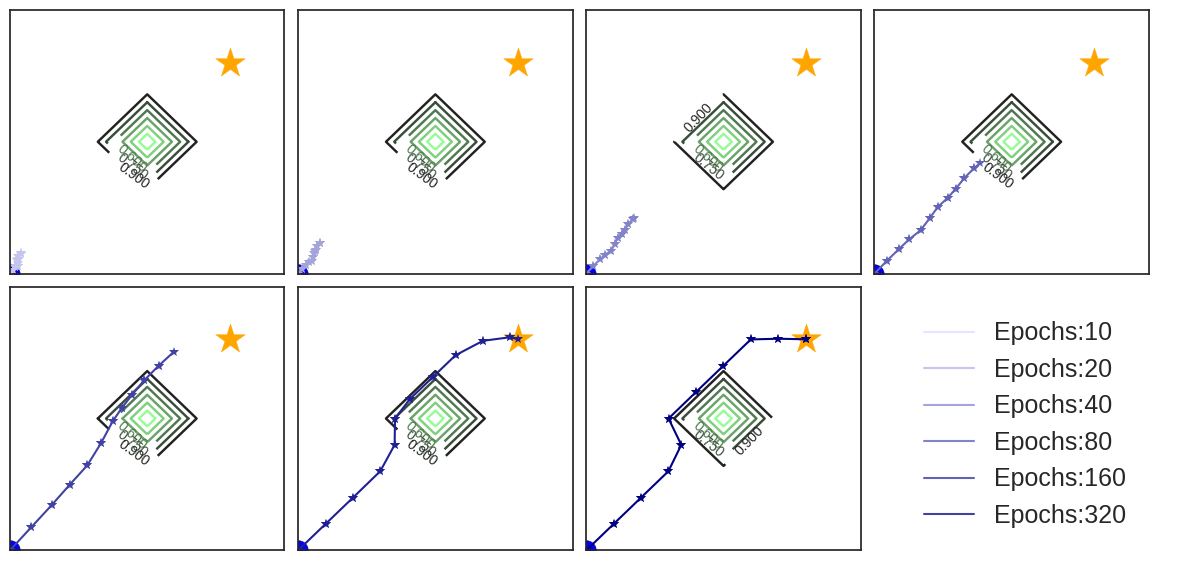

In [5]:
Virtualizing(data[[1,2,4,8,16,32,64],:11],fix)